In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3eca5c9e82de47e5d031331b107ae04


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | katsuura
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | kodinsk
Processing Record 7 of Set 1 | kyzyl-suu
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | leningradskiy
Processing Record 2

Processing Record 42 of Set 4 | barranca
Processing Record 43 of Set 4 | naze
Processing Record 44 of Set 4 | churumuco
City not found. Skipping...
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | ridgecrest
Processing Record 47 of Set 4 | samarai
Processing Record 48 of Set 4 | san cristobal
Processing Record 49 of Set 4 | kodiak
Processing Record 50 of Set 4 | kudahuvadhoo
Processing Record 1 of Set 5 | maningrida
Processing Record 2 of Set 5 | myitkyina
Processing Record 3 of Set 5 | akdagmadeni
Processing Record 4 of Set 5 | grand-santi
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | shubarkuduk
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | marcona
City not found. Skipping...
Processing Record 9 of Set 5 | ponta delgada
Processing Record 10 of Set 5 | viedma
Processing Record 11 of Set 5 | namibe
Processing Record 12 of Set 5 | nantucket
Processing Record 13 of Set 5 | salinopolis
Processing Record 14 of Set 5 | sha

Processing Record 33 of Set 8 | tripoli
Processing Record 34 of Set 8 | celestun
Processing Record 35 of Set 8 | bodden town
Processing Record 36 of Set 8 | kaitong
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | dolores
Processing Record 39 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 8 | rundu
Processing Record 41 of Set 8 | tual
Processing Record 42 of Set 8 | helsinge
Processing Record 43 of Set 8 | sorland
Processing Record 44 of Set 8 | rumonge
Processing Record 45 of Set 8 | port augusta
Processing Record 46 of Set 8 | pingxiang
Processing Record 47 of Set 8 | axim
Processing Record 48 of Set 8 | arlit
Processing Record 49 of Set 8 | jalu
Processing Record 50 of Set 8 | kismayo
Processing Record 1 of Set 9 | hurghada
Processing Record 2 of Set 9 | wiang sa
Processing Record 3 of Set 9 | ravar
Processing Record 4 of Set 9 | bud
Processing Record 5 of Set 9 | grindavik
Processing Record 6 of Set 9 | mahanoro
Processing Record 

Processing Record 23 of Set 12 | elko
Processing Record 24 of Set 12 | alofi
Processing Record 25 of Set 12 | nguiu
City not found. Skipping...
Processing Record 26 of Set 12 | pierre
Processing Record 27 of Set 12 | invermere
Processing Record 28 of Set 12 | pauini
Processing Record 29 of Set 12 | nguruka
Processing Record 30 of Set 12 | bakchar
Processing Record 31 of Set 12 | vouliagmeni
Processing Record 32 of Set 12 | sistranda
Processing Record 33 of Set 12 | te anau
Processing Record 34 of Set 12 | sinnamary
Processing Record 35 of Set 12 | sweetwater
Processing Record 36 of Set 12 | hirara
Processing Record 37 of Set 12 | panguna
Processing Record 38 of Set 12 | bilibino
Processing Record 39 of Set 12 | yeppoon
Processing Record 40 of Set 12 | morgan city
Processing Record 41 of Set 12 | cap malheureux
Processing Record 42 of Set 12 | sao felix do xingu
Processing Record 43 of Set 12 | iranshahr
Processing Record 44 of Set 12 | bam
Processing Record 45 of Set 12 | valteron
Proc

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,-27.17,87,91,9.69,RU,2021-02-07 02:47:06
1,Ponta Do Sol,32.6667,-17.1000,55.00,64,28,8.01,PT,2021-02-07 02:42:14
2,Nikolskoye,59.7035,30.7861,10.40,85,75,13.42,RU,2021-02-07 02:44:53
3,Katsuura,35.1333,140.3000,59.00,44,0,9.22,JP,2021-02-07 02:47:06
4,Mataura,-46.1927,168.8643,79.74,47,25,3.09,NZ,2021-02-07 02:47:06
5,Kodinsk,58.6881,99.1844,19.29,96,100,7.29,RU,2021-02-07 02:47:07
6,Kyzyl-Suu,42.3414,78.0056,32.22,83,100,4.12,KG,2021-02-07 02:47:07
7,Mar Del Plata,-38.0023,-57.5575,64.00,77,20,11.50,AR,2021-02-07 02:46:43
8,Hermanus,-34.4187,19.2345,66.99,94,98,1.99,ZA,2021-02-07 02:47:07
9,Faanui,-16.4833,-151.7500,82.33,69,2,10.85,PF,2021-02-07 02:42:18


In [10]:
# Rearrange DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2021-02-07 02:47:06,73.5069,80.5464,-27.17,87,91,9.69
1,Ponta Do Sol,PT,2021-02-07 02:42:14,32.6667,-17.1000,55.00,64,28,8.01
2,Nikolskoye,RU,2021-02-07 02:44:53,59.7035,30.7861,10.40,85,75,13.42
3,Katsuura,JP,2021-02-07 02:47:06,35.1333,140.3000,59.00,44,0,9.22
4,Mataura,NZ,2021-02-07 02:47:06,-46.1927,168.8643,79.74,47,25,3.09
5,Kodinsk,RU,2021-02-07 02:47:07,58.6881,99.1844,19.29,96,100,7.29
6,Kyzyl-Suu,KG,2021-02-07 02:47:07,42.3414,78.0056,32.22,83,100,4.12
7,Mar Del Plata,AR,2021-02-07 02:46:43,-38.0023,-57.5575,64.00,77,20,11.50
8,Hermanus,ZA,2021-02-07 02:47:07,-34.4187,19.2345,66.99,94,98,1.99
9,Faanui,PF,2021-02-07 02:42:18,-16.4833,-151.7500,82.33,69,2,10.85


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

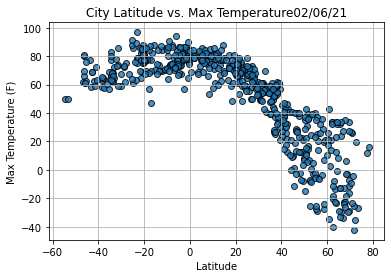

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

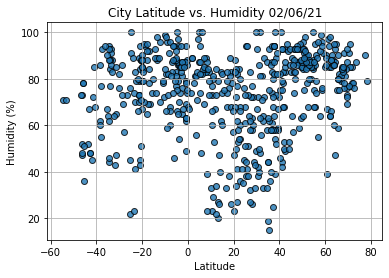

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

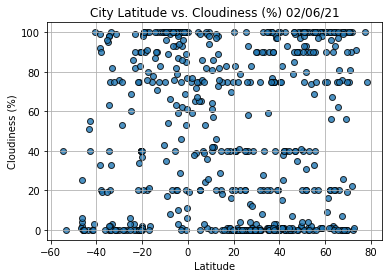

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

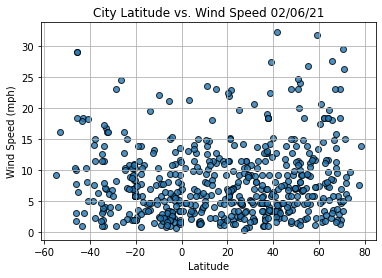

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
from scipy.stats import linregress

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                   Kaitangata
Country                        NZ
Date          2021-02-07 02:47:08
Lat                      -46.2817
Lng                       169.846
Max Temp                       66
Humidity                       73
Cloudiness                      2
Wind Speed                     10
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2021-02-07 02:47:06,73.5069,80.5464,-27.17,87,91,9.69
1,Ponta Do Sol,PT,2021-02-07 02:42:14,32.6667,-17.1000,55.00,64,28,8.01
2,Nikolskoye,RU,2021-02-07 02:44:53,59.7035,30.7861,10.40,85,75,13.42
3,Katsuura,JP,2021-02-07 02:47:06,35.1333,140.3000,59.00,44,0,9.22
5,Kodinsk,RU,2021-02-07 02:47:07,58.6881,99.1844,19.29,96,100,7.29


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

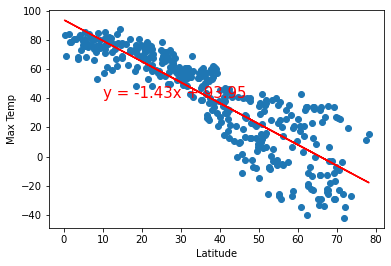

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

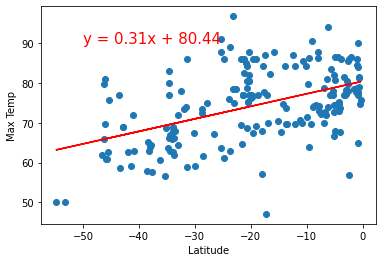

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

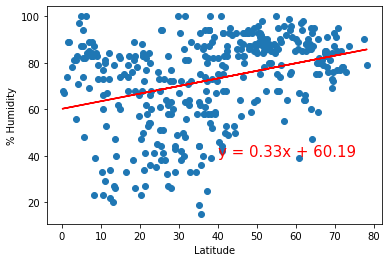

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,40))

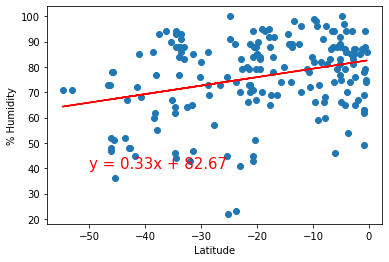

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,40))

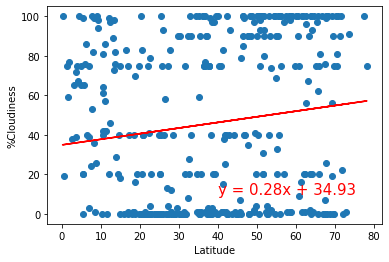

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for %Cloudiness', '%Cloudiness',(40,10))

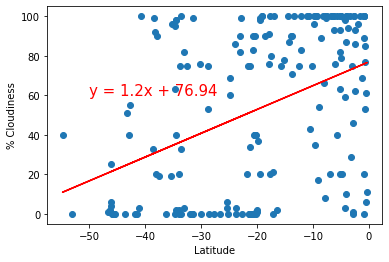

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

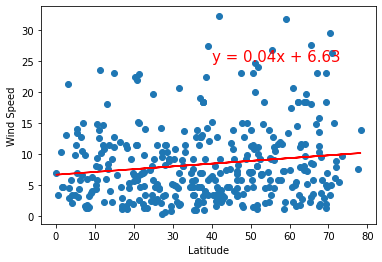

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

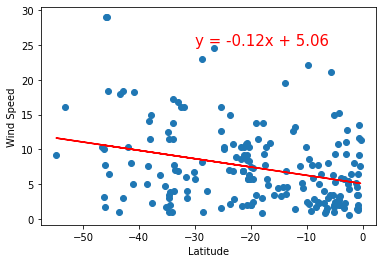

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,25))